# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

This is more of a abstract overview / Meta Data of the Dataset

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Some infomation on the features of the Dataset and any missing values in the data set 

# Prepraring the Dataset 

In [7]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The DataFrame(Data) now all the independent features (features that will be used to predict the target ie. price) 

In [9]:
data['price']=boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The DataFrame (Data) now all the independent features (features that will be used to predict the target ie. price) + the dependent variable( target ie. price)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Some info on the Datatype and Missing values in the features of the data set

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Gives some basic stats on the Dataset.

In [13]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

Checking Missing value count in each features

In [14]:
corr =data.corr()

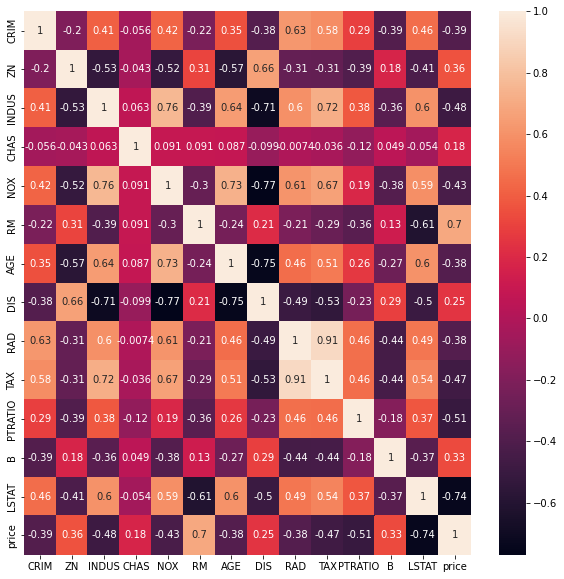

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=data.columns,yticklabels=data.columns,annot=True,ax=ax)

here we check correlation between features. 

if we are checking relation between Independent and Dependent variable, the closer the value to +1 or -1 the highly positively Correlated or negatively correlated ie. the independent is highly effective in predicting a dependent variable.

if we are checking relation between 2 Independent variable, the 2 features are highly positively Correlated or negatively correlated ie. one of the independent variables can be eleminated as they have the same effect to predict the dependent variable.

Here we see RM is hight correlated with price and LSTAT is highly -vely correlated with price

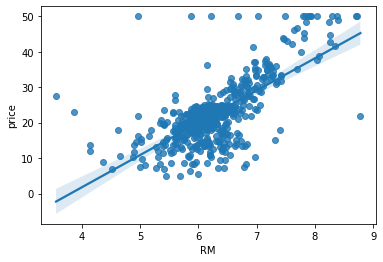

In [16]:
import seaborn as sns
sns.regplot(x="RM",y="price",data=data)

To show the relation Between RM and price we have plotted the above. we see there is increase in price value with Increase in RM wrt to the linear line.

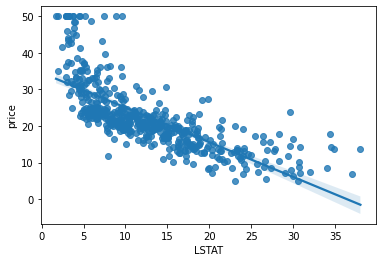

In [17]:
import seaborn as sns
sns.regplot(x="LSTAT",y="price",data=data)

To show the relation Between LSTAT and price we have plotted the above. we see there is decrease in price value with Increase in LSTAT wrt to the linear line.

# Data Split & Data Normalization

In [18]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

Now to train the model we have to split the data back to all independent variables in X and dependent variable to y

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

We perform a train test 70-30 split on the dataset

*Why train-test split?*

We are doing so for the model to learn on 70% of the data and testing on the 30% how well our model does

*Why Xtrain,Ytrain and Xtest,Ytest?*

Firstly the intention of X and y is such that the model predict the independent(y) using dependent(X). Model learns to do so by learning to map X_train->Y_train and then we check models performace by giving it new data(Xtest) and measure how well it could predict Ytest

# Prediction

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

We are standard scalling all the values in both Xtrain and Xtest

*Why Standardise?*
Standardization is normalizing data to the same scale. 

*Why Normalize?*

Different features are in different ranges and have different units. To approach the convergence to global minima faster in the gradient Descent.

More on gradient decend- https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer



Also the same technique used to train the Training set has to be applied to the set hence we just use transform() on X_test rather fit_transform().

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

Here the model learns to map X_train -> Y_train

In [28]:
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


Coefficient of each of the feature signify with how much increase in value of feature how much increase or decrease value eg. with 1 unit increase in CRIM there is 1.108... decrease in price

In [29]:
print(regression.intercept_)

23.01581920903955


Intercept is the bias that is price remains 23.015 if all the Coefficient are 0.

In [30]:
reg_pred=regression.predict(X_test)

Now reg_pred has the predicted value

# Performance Matrix

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.162709871457406
21.517444231177212
4.638689926172821


MAE- It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.

MSE - finding the squared difference between actual and predicted value. Same as MAE but squared difference.we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

RMSE- it is a simple square root of mean squared error.

More on MAE, MSE, RMSE - https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/


from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


**R square** 

Formula:

R^2 = 1 - SSR/SST

R^2 = coefficient of determination

SSR = sum of squares of residuals

SST = total sum of squares

In [36]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

**adjusted R square**

R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model 

n: The number of observations 

k: The number of predictor variables

The Adjusted R square is always less than R square. The closer the value  of Adjusted R square & adjusted R square error is to 1 the better.  

# Prediction on Unseen Data

In [37]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

reshape such that it is passed to be model in an acceptable shape(2d) as the above boston.data[0] would result in (13,)(1d) which cannot be passed to the model as is.

In [38]:
scaler.transform(boston.data[0].reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

Same as training and test data Normalization has to be done.

In [41]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

predicted house price for the unseen data is 30.

# Pickle The Model file For Deployment

In [50]:
import pickle

In [51]:
pickle.dump(regression,open('regmodel.pkl','wb'))

Here we dump the Model object to the file mentioned in 2nd param using pickle. Pickle files are usually in serialized format. 

In [52]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

Here we load our object in the regmodel.pkl file to pickled_model

In [53]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

We perform the same prediction done for unseen data on the loaded model. 